# <p style="text-align: center;"> Pet Finder with Machine Learning </p>
### <p style="text-align: center;"> Prabal Ghosh </p>

#### <p style="text-align: center;"> MSc Data Science & Artificial Intelligence </p>
#### <p style="text-align: center;"> More on Learning Algorithms </p> 
#### <p style="text-align: center;"> 01/03/2024 </p>

## Introduction


The dataset presents pet's characteristics and includes tabular, text and image data. It's come from: https://www.petfinder.my.

``The aim is to predict the rate at which a pet is adopted.``

Data fields:

``index`` - Unique hash ID of pet profile  
``Type`` - Dog or Cat  
``Age`` - Age of pet when listed, in months  
``Gender`` - Gender of pet (Male, Female, Mixed, if profile represents group of pets)  
``Color1`` - Color 1 of pet  
``Color2`` - Color 2 of pet   
``Color3`` - Color 3 of pet   
``MaturitySize`` - Size at maturity (Small, Medium, Large, Extra Large, Not Specified)  
``FurLength`` - Fur length (Short, Medium, Long, Not Specified)  
``Vaccinated`` - Pet has been vaccinated (Yes, No, Not Sure)  
``Dewormed`` - Pet has been dewormed (Yes, No, Not Sure)  
``Sterilized`` - Pet has been spayed / neutered (Yes, No, Not Sure)  
``Health`` - Health Condition (Healthy, Minor Injury, Serious Injury, Not Specified)  
``Fee`` - Adoption fee (0 = Free)  
``Breed`` - breed of pet (see on the dataset)  
``Description`` - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.  
``Image`` - a pointer to an image    
  
``The aim is to predic AdoptionSpeed. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way: ``

``0`` - Pet was adopted on the same day as it was listed.   
``1`` - Pet was adopted between 1 and 7 days (1st week) after being listed.   
``2`` - Pet was adopted between 8 and 30 days (1st month) after being listed.   
``3`` - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.   
``4`` - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).  
  
Submissions are scored based on the quadratic weighted kappa, which measures the agreement between two ratings. This metrics exist on sklean: sklearn.metrics.cohen_kappa_score with weights="quadratic".

## Libraries

In [1]:
# Importing required libraries and methods

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.porter import PorterStemmer
from imblearn.over_sampling import SMOTE

from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

import unicodedata

import cv2
import numpy as np
from sklearn.cluster import MiniBatchKMeans

## Dataset Train and Test

In [2]:
# Read train files
df_train = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train.csv", index_col=0)
print("In the dataset they are : ", df_train.shape[0], "train observations")
df_train.head(2)

In the dataset they are :  9000 train observations


,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed
Type,,,,,,,,,,,,,,,,
Dog,84.0,Male,Brown,Cream,Unknown,Small,No,Unknown,Yes,No,Healthy,0.0,He is either lost or abandoned. Please contact...,4.0,3b178aa59-5.jpg,Terrier
Dog,1.0,Female,Black,Unknown,Unknown,Medium,Yes,No,Yes,No,Healthy,50.0,"Hi, my name is Rose. I'm very friendly and am ...",3.0,2fbf2cb7c-1.jpg,Mixed_Breed


In [3]:
# Read test file
df_test = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test.csv", index_col=0)
print("In the dataset they are : ", df_test.shape[0], "test observations")
df_test.head(2)

In the dataset they are :  500 test observations


,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed
Type,,,,,,,,,,,,,,,
Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",5df99d229-2.jpg,Domestic_Short_Hair
Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",a08030c6f-2.jpg,Mixed_Breed


# Checking for missing data

I am checking for missing data because if I have the model can't learn properly, since some of the data would have values that don't represent the reality. 
Generally we use inputers to replace the missing data with statistical meassures such as the mean/median for numerical columns and the mode for categorical columns, but first we need to check if there is missing data at all.
We will do that in both train and test datasets just in case.

## Train

In [4]:
if df_train.isnull().any().any():
    print('There are missing values in the train dataset')
else:
    print('The train dataset does not contain any missing values')

The train dataset does not contain any missing values


``I want to be sure that there are no missing data.``

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, Dog to Dog
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            9000 non-null   float64
 1   Gender         9000 non-null   object 
 2   Color1         9000 non-null   object 
 3   Color2         9000 non-null   object 
 4   Color3         9000 non-null   object 
 5   MaturitySize   9000 non-null   object 
 6   FurLength      9000 non-null   object 
 7   Vaccinated     9000 non-null   object 
 8   Dewormed       9000 non-null   object 
 9   Sterilized     9000 non-null   object 
 10  Health         9000 non-null   object 
 11  Fee            9000 non-null   float64
 12  Description    9000 non-null   object 
 13  AdoptionSpeed  9000 non-null   float64
 14  Images         9000 non-null   object 
 15  Breed          9000 non-null   object 
dtypes: float64(3), object(13)
memory usage: 1.2+ MB


``In the cell above, I can see the types of every features and the count of non-null values for each column as we can see, there are no null values in the train dataset.``

I want to do the same in the ``test`` data set

## Test

In [6]:
if df_test.isnull().any().any():
    print('There are missing values in the test dataset')
else:
    print('The test dataset does not contain any missing values')

The test dataset does not contain any missing values


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Cat to Dog
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           500 non-null    float64
 1   Gender        500 non-null    object 
 2   Color1        500 non-null    object 
 3   Color2        500 non-null    object 
 4   Color3        500 non-null    object 
 5   MaturitySize  500 non-null    object 
 6   FurLength     500 non-null    object 
 7   Vaccinated    500 non-null    object 
 8   Dewormed      500 non-null    object 
 9   Sterilized    500 non-null    object 
 10  Health        500 non-null    object 
 11  Fee           500 non-null    float64
 12  Description   500 non-null    object 
 13  Images        500 non-null    object 
 14  Breed         500 non-null    object 
dtypes: float64(2), object(13)
memory usage: 62.5+ KB


As we can see, there are no null values in the test dataset.

So we don't need to input any missing data at all.

## Types of each feature

In [8]:
print(df_train.dtypes)

Age              float64
Gender            object
Color1            object
Color2            object
Color3            object
MaturitySize      object
FurLength         object
Vaccinated        object
Dewormed          object
Sterilized        object
Health            object
Fee              float64
Description       object
AdoptionSpeed    float64
Images            object
Breed             object
dtype: object


In [9]:
print(df_test.dtypes)

Age             float64
Gender           object
Color1           object
Color2           object
Color3           object
MaturitySize     object
FurLength        object
Vaccinated       object
Dewormed         object
Sterilized       object
Health           object
Fee             float64
Description      object
Images           object
Breed            object
dtype: object


##  Number of observations for the train and the test

In [10]:
print("I have: ", df_train.shape[0], "observations in my train dataset")
print("I have: ", df_test.shape[0], "observations in my test dataset")

I have:  9000 observations in my train dataset
I have:  500 observations in my test dataset


## Separating Numerical and Categorical columns

I am going to separate the numerical and categorical in different lists because later I would need to apply different trasformations to each type of column in the pipeline.
I am not goind to take into account the ``target, description and images`` columns because they are not numerical or categorical (technically, the target is categorical but it does not matter as we want to predict it and will not use it as part of our input data). 

I do not want ot change the original dataset so I will assign X (input data) and y (target) to different variables.

In [11]:
X_test = df_test.copy()
X = df_train.drop('AdoptionSpeed', axis=1).copy()
y = np.array(df_train['AdoptionSpeed']).reshape(-1,1)

I will now use selectors to select the columns appropriately. The code below does the following?

- Defines ``numerical_columns_selector`` which defines a column ``selector`` that selects all columns 
in X (the input data) that have a data type that is not an object (i.e., non-categorical columns).

- Defines ``categorical_columns_selector`` which defines a column ``selector`` that selects all columns in X that have an object data type but excludes any columns with names that contain the strings "Description" or "Images".

- Assigns to ``numerical_columns`` the result of the ``numerical_columns_selector`` applied to the dataset X, which returns a list of column names corresponding to numerical columns in X.

- Assigns to ``categorical_columns`` the result of the ``categorical_columns_selector`` applied to X, which returns a list of column names corresponding to categorical columns in X that do not contain "Description" or "Images" in their name.

In [12]:
numerical_columns_selector = selector(dtype_exclude=object) 
categorical_columns_selector = selector(pattern=r'^(?!.*(Description|Images))',dtype_include=object)
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

c:\Users\praba\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1418: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cols = cols[cols.str.contains(self.pattern, regex=True)]


Printing the two lists, so I can verify.

In [13]:
print("List of numerical columns: ",numerical_columns)
print("List of categorical columns: ", categorical_columns)

List of numerical columns:  ['Age', 'Fee']
List of categorical columns:  ['Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Breed']


### Number of observations per class

I am serching to see if the dataset is balanced or not.
This is important because an imbalanced dataset can lead to biased models and inaccurate predictions.

When a dataset is imbalanced, the model may end up being biased towards the majority class, ignoring the minority class, which can be problematic in many real-world scenarios where the minority class is of equal or even greater importance than the majority class.

In [14]:
class_counts = df_train['AdoptionSpeed'].value_counts()
print("Number of observations per class:\n ", class_counts)

Number of observations per class:
  AdoptionSpeed
2.0    2504
4.0    2294
3.0    2061
1.0    1894
0.0     247
Name: count, dtype: int64


I see that the class 0.0 is much less present that the others classes, that makes me think that the dataset is unbalanced. Let's see it in percentages.

In [15]:
df_train['AdoptionSpeed'].value_counts(normalize=True)

AdoptionSpeed
2.0    0.278222
4.0    0.254889
3.0    0.229000
1.0    0.210444
0.0    0.027444
Name: proportion, dtype: float64

0.0: 0.027444 (2.7%)  
1.0: 0.210444 (21.0%)  
2.0: 0.278222 (27.8%)  
3.0: 0.229000 (22.9%)  
4.0: 0.254889 (25.5%)  

We notice that the most frequent value, 2.0, appears nearly 10 times more frequently than the least frequent value, 0.0. This degree of imbalance could potentially lead to biased model performance if not handled properly. Later In the code I will use ``smote`` like we learned in the lesson how to handle with unbalance datasets. 

## Ordinal Mapping

Ordinal encoding, is a process of transforming categorical variables into numerical variables while preserving the order or hierarchy of the categories. We can apply it to columns of our dataset which are categorical at a first glance but which some kind of progression can be identified in the unique values of the column (such as a progression in size, age, etc).

To identify this, we need to study our columns' unique values.

This function below returns a dictionary where the keys are the column names specified in columns 
and the values are the unique values in each column as a list.

In [16]:
def unique_per_column(df, columns=[]):
    return {col:df[col].unique().tolist() for col in (columns if columns else df)}

In this way I can study my data's unique values:

In [17]:
unique_per_column(df_train, columns=categorical_columns)

{'Gender': ['Male', 'Female'],
 'Color1': ['Brown', 'Black', 'Golden', 'White', 'Cream', 'Yellow', 'Gray'],
 'Color2': ['Cream', 'Unknown', 'White', 'Golden', 'Gray', 'Brown', 'Yellow'],
 'Color3': ['Unknown', 'White', 'Golden', 'Gray', 'Cream', 'Yellow'],
 'MaturitySize': ['Small', 'Medium', 'Large', 'Extra Large'],
 'FurLength': ['No', 'Yes', 'Unknown'],
 'Vaccinated': ['Unknown', 'No', 'Yes'],
 'Dewormed': ['Yes', 'No', 'Unknown'],
 'Sterilized': ['No', 'Unknown', 'Yes'],
 'Health': ['Healthy', 'Minor Injury', 'Serious Injury'],
 'Breed': ['Terrier',
  'Mixed_Breed',
  'Cocker_Spaniel',
  'German_Shepherd_Dog',
  'Domestic_Medium_Hair',
  'Bull_Terrier',
  'Belgian_Shepherd_Malinois',
  'English_Springer_Spaniel',
  'Beagle',
  'Siamese',
  'Corgi',
  'Siberian_Husky',
  'Domestic_Short_Hair',
  'Golden_Retriever',
  'Coonhound',
  'Maine_Coon',
  'Persian',
  'Tabby',
  'Domestic_Long_Hair',
  'Turkish_Angora',
  'Calico',
  'Basset_Hound',
  'Rottweiler',
  'English_Bulldog',
  'M

The column ``MaturitySize`` is ordinal (there is a progression from small to extra large in its values), so we can map it as an ``ordinal column``.

In [18]:
cat_ORD = ['MaturitySize']

class ord_MAP(BaseEstimator,TransformerMixin):
    
    def __init__(self,cat_ORD=cat_ORD):
        self.cat_ORD = cat_ORD
        
        # this maps the categorical values to numerical values across all the features
        self.ord_map = {'Small':0, 'Medium':1, 'Large':2, 'Extra Large':3}
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X = X.copy()
        for att in self.cat_ORD:
            X[att] = X[att].map(self.ord_map)
        return X

We need to update our lists with the categorical and numerical columns now. The ordinal column is a numerical column now since it was encoded ordinally.

In [19]:
numerical_columns = numerical_columns + ['MaturitySize']

In [20]:
categorical_columns.remove('MaturitySize')

## Cardinality Reduction

``Cardinality reduction`` is the process of reducing the number of unique values or levels in a categorical variable. ``Categorical`` variables can have a high number of unique values or levels and keeping those can interfere with the learning by making it take too much time and even worsening the accuracy in some cases by introducing irrelevant features with one-hot encoding.

Before we check if we need to apply it, let's take a look at the stats of our categorical columns. We exclude out text and image data as well as the target from this because there is no point to reducing the features in those columns.

In [21]:
df_train[categorical_columns].describe(include='all')

,Gender,Color1,Color2,Color3,FurLength,Vaccinated,Dewormed,Sterilized,Health,Breed
count,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000
unique,2,7,7,6,3,3,3,3,3,153
top,Female,Black,Unknown,Unknown,Yes,Yes,Yes,No,Healthy,Mixed_Breed
freq,5047,4123,3078,7055,5397,4113,5710,5835,8691,3776


As we can see, ost columns are fine in terms of cardinality, but we have 153 unique values for the breed column, which is a lot. We need to reduce our cardinality by grouping those values in a smaller number of categories

In [22]:
class ReduceCardinalityTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, very_rare_threshold=0.001, rare_threshold=0.0025, very_uncommon_threshold=0.005, uncommon_threshold=0.01):
        self.very_rare_threshold = very_rare_threshold
        self.rare_threshold = rare_threshold
        self.very_uncommon_threshold = very_uncommon_threshold
        self.uncommon_threshold = uncommon_threshold
        self.high_cardinality = False
        

    def fit(self, X, y=None):
        self.columns_to_transform_ = X.columns[X.nunique() > 30]
        self.mappings_ = {}
        for col in self.columns_to_transform_:
            value_counts = X[col].value_counts(normalize=True)
            very_rare_values = value_counts[value_counts < self.very_rare_threshold].index.tolist()
            rare_values = value_counts[(value_counts >= self.very_rare_threshold) & (value_counts < self.rare_threshold)].index.tolist()
            very_uncommon_values = value_counts[(value_counts >= self.rare_threshold) & (value_counts < self.very_uncommon_threshold)].index.tolist()
            uncommon_values = value_counts[(value_counts >= self.very_uncommon_threshold) & (value_counts < self.uncommon_threshold)].index.tolist()
            self.mappings_[col] = {
                'very_rare': very_rare_values,
                'rare': rare_values,
                'very_uncommon': very_uncommon_values,
                'uncommon': uncommon_values
            }
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.columns_to_transform_:
            mappings = self.mappings_[col]
            X_transformed[col] = np.select(
                [X_transformed[col].isin(mappings['very_rare']),
                 X_transformed[col].isin(mappings['rare']),
                 X_transformed[col].isin(mappings['very_uncommon']),
                 X_transformed[col].isin(mappings['uncommon'])],
                ['Very Rare', 'Rare', 'Very Uncommon', 'Uncommon'],
                default=X_transformed[col]
            )
        return X_transformed

The purpose of this class is to transform categorical features with high cardinality (i.e., many unique values) into categorical features with lower cardinality by ``grouping infrequent values into broader categories.``

### One-Hot Encoding for Categorical Variables

I have used OneHotEncoding to represent the categorical variable into a numerical vector (single representation)  
``In the pipeline I will use ohe to represent the categorical variable into a numerical vectors and the standard scaler to standardise the numerical data.``

In [23]:
# ohe = OneHotEncoder(sparse=False,handle_unknown="ignore")
ohe = OneHotEncoder(handle_unknown="ignore")


## Text preprocessing

We need to do some preprocessing with our text data. For example, it is littered with emojis and non-latin characters. Below, we write a function to clean the data of emojis, non-latin characters and other kinds of special characters.

In [24]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\praba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\praba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\praba\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Those are the cleaning functions we already used in previous machine learning labs. I will be reusing them in this project in other to preprocess my text data by deleting stopwords, removing strange characters, and applying lemmatization.

In [25]:
def del_stops(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stops:
            filtered_sentence.append(w)
    result=' '.join(filtered_sentence)
    return result

Process the data

In [26]:
def step1(sent):
    # sent = on sentence in a language
    def unicode_to_ascii(s):
        return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

    sent = unicode_to_ascii(sent.lower().strip())

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
    sent = re.sub(r"([?.!,¿])", r" \1 ", sent)
    sent = re.sub(r'[" "]+', " ", sent)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    sent = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sent)
    
    #removing emojis and non latin symbols (chinese, russian etc...)
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    sent= re.sub(emoj, '', sent)
    

    return sent.strip()

In [27]:
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text=text.lower() #lowercase the text
    #text=re.sub(r'[^\w\s]', '', text) #remove punctuation  Voir si besoin de ça
    text=del_stops(text) #delete stop words
    text=lemmatizer.lemmatize(text)
    text=step1(text)
    return text

I preprocess the text in the 'Description' feature for both the training and testing datasets.

In [28]:
X.Description = np.array([clean_text(r) for r in X.Description])
X_test.Description = np.array([clean_text(r) for r in X_test.Description])

Here I add to the feature, "Images" the path to the images.

In [29]:
# X['Images']="train\\"+ X['Images']
# X_test['Images']="test\\"+ X_test['Images']

In [30]:
img_dir = "C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train_images_all\\"
test_img_dir = "C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test_images_all\\"
# train_df['Images'] = [img_dir+img for img in train_df['Images']]
# test_df['Images']= [test_img_dir + img for img in test_df['Images']]

In [31]:
X['Images']=img_dir+ X['Images']
X_test['Images']=test_img_dir+ X_test['Images']

In [32]:
X['Images'][0]

'C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train_images_all\\3b178aa59-5.jpg'

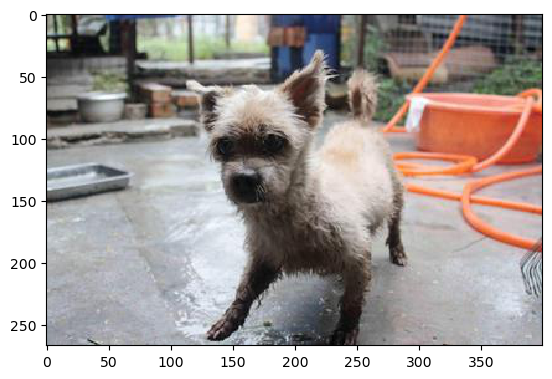

In [33]:
from matplotlib.image import imread
# train_df['Images'][8]
# img = imread(r"C:\Users\praba\Documents\GitHub\UCA SEMESTER 2 M1\deeplearning 2\final project and lab\drive-download-20240301T144626Z-001\train_images_all\3b178aa59-5.jpg")
img = imread(X['Images'][0])

plt.imshow(img, cmap='gray', interpolation='nearest',aspect='equal')

# Image

In [34]:
# !pip install opencv-contrib-python

## Image Preprocessing

SIFT (Scale-Invariant Feature Transform) is a feature extraction technique used in computer vision and image processing for detecting and describing local features in images. SIFT features are useful for a wide range of applications such as object recognition, image registration, 3D reconstruction, and image retrieval.

This code performs the following steps:

- ``Extracts Scale-Invariant Feature Transform (SIFT)`` features from a list of images and returns a list of these features.

- ``Builds a clusterizer`` (a clustering algorithm) using the list of extracted SIFT features and a desired number of clusters. The clusterizer is then fitted to the SIFT features and returned.

- ``Constructs a Bag of Features (BOF)`` representation using the list of SIFT features and the fitted clusterizer. The BOF representation is a histogram of the frequency of each cluster (i.e., visual word) in the SIFT features of an image.

In [35]:
def extract_SIFT(img_lst):
    
    sift = cv2.SIFT_create()
    sifts = []
    
    for img in img_lst:
        img=cv2.imread(img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, desc = sift.detectAndCompute(gray, None)
        sifts.append(desc)
    
    return sifts



def clusterize(SIFTs, nb_cluster):
    
    SIFTs = np.vstack(SIFTs)
    clusterizer = MiniBatchKMeans(n_clusters=nb_cluster, random_state=42)
    clusterizer.fit(SIFTs)
    return clusterizer



def build_BOFs(SIFTs, clusterizer):
    
    
    BOFs = []
    
    for sift in SIFTs:
        labels = clusterizer.predict(sift)
        hist, _ = np.histogram(labels, bins=range(clusterizer.n_clusters+1), density=True)
        BOFs.append(hist)
        
    return np.array(BOFs)


class MyImageTransformer(BaseEstimator,TransformerMixin):
    def __init__(self, nb_cluster= 3):
        self.nb_cluster = nb_cluster
        self.clusterizer = None
        
    def fit(self, X, y=None):
        self.SIFTs = extract_SIFT(X)
        self.clusterizer = clusterize(self.SIFTs, self.nb_cluster)
        return self
        
    def transform(self, X, y=None):
        SIFTs = extract_SIFT(X)
        return build_BOFs(SIFTs, self.clusterizer)
    
    def fit_transform(self, X, y=None):
        self.SIFTs = extract_SIFT(X)
        self.clusterizer = clusterize(self.SIFTs, self.nb_cluster)
        return build_BOFs(self.SIFTs, self.clusterizer)

# Pre-processing Pipeline

To achieve accurate machine learning results, it's important to use a balanced dataset. This means that the number of samples for each class in the dataset should be roughly the same. If the dataset is imbalanced, the machine learning model may be biased towards the majority class, leading to poor performance on the minority class.

To address this issue, my approach is to balance the dataset using a technique like SMOTE (Synthetic Minority Over-sampling Technique). SMOTE is a data augmentation technique that generates synthetic samples for the minority class by creating new samples that are combinations of existing minority samples.

In this case, I plan to compare the performance of two different preprocessing approaches. The first approach will not balance the dataset, while the second approach will use SMOTE to balance the dataset. By comparing the accuracy of the two approaches, I will be able to see how much of an impact balancing the dataset has on the performance of the machine learning model.

Overall, it's important to balance the dataset to avoid bias and ensure accurate machine learning results. By using a technique like SMOTE, the dataset can be balanced and the machine learning model can perform better on both majority and minority classes.

Performing ``cross-validation`` is a powerful method to evaluate the performance of a machine learning model. However, it can be computationally expensive, especially when the dataset is large. In this case, In my case I am facing a time constraint, and the computer takes a long time to perform cross-validation.

To optimize my time, I am planning to only perform cross-validation on the balanced dataset since this is the recommended approach. I will not perform cross-validation on the non-balanced dataset because I only want to compare its accuracy with the accuracy of the balanced dataset. The non-balanced dataset I am using to see the difference in accuracy between the two approaches.

## Building Pre-processing Pipeline (No balanced data)

Here I am joing every step of the preprocessing in a single pipeline.

This pipeline performs a series of transformations to the raw data to prepare it for use in a machine learning model. Each step is designed to transform a specific type of data (text, image, numerical, categorical) into a format that can be used by the model. By combining these steps into a pipeline, the data can be transformed efficiently and consistently, making it easier to fit to a machine learning model.

- The ``general_preprocessor`` step is going to be applied only to the column MaturitySize because it is the only column with the values mapped in the transformer.

- The ``text_preprocessor`` step is going to convert text into a matrix of token counts, where each row represents a document and each column represents a unique word in the dataset.

- The ``image_preprocessor`` step is going to applie various image processing techniques to the images in the dataset, like I explained before, such as resizing or applying filters, to prepare them for use in a machine learning model.

- The ``numerical_preprocessor`` is going with a standardization transformation to the numerical data in the dataset. Standardization scales the numerical data so that it has a mean of 0 and a standard deviation of 1, which can improve the performance of some machine learning models.

- The ``categorical_preprocessor`` step  is going to reduce the cardinality of categorical features with a large number of unique values and ``ohe`` (one-hot encoding) is applied to convert the categorical features into binary vectors.

- The ``Smote`` step is used to address class imbalance in a dataset.

In [36]:
general_preprocessor =  ImbPipeline([
    ('ord_map',ord_MAP())
])

text_preprocessor =  ImbPipeline([
    ('text', CountVectorizer())
])
image_preprocessor =  ImbPipeline([
    ("img", MyImageTransformer())
])
numerical_preprocessor =  ImbPipeline([
        ("scl", StandardScaler())
    ])
categorical_preprocessor =  ImbPipeline([
    ("rct", ReduceCardinalityTransformer()),
    ("ohe", ohe)
])

preprocessor_without = ImbPipeline([
    ("ord", ord_MAP()),
    ('ct', ColumnTransformer([
    ('text_preprocessor', text_preprocessor, "Description"),
    ('image_preprocessor', image_preprocessor, "Images"),
    ('categorical_preprocessor', categorical_preprocessor, categorical_columns),
    ('numerical_preprocessor', numerical_preprocessor, numerical_columns)]))])

# Building Pre-processing Pipeline (balanced dataset)

I added ``SMOTE()`` in the pipeline to balance the dataset. Like I said in one of the previous steps, balancing the dataset makes training a model more efficient because it helps prevent the model from becoming biassed towards one class.

In [37]:
general_preprocessor =  ImbPipeline([
    ('ord_map',ord_MAP())
])

text_preprocessor =  ImbPipeline([
    ('text', CountVectorizer())
])
image_preprocessor =  ImbPipeline([
    ("img", MyImageTransformer())
])
numerical_preprocessor =  ImbPipeline([
        ("scl", StandardScaler())
    ])
categorical_preprocessor =  ImbPipeline([
    ("rct", ReduceCardinalityTransformer()),
    ("ohe", ohe)
])


preprocessor = ImbPipeline([
    ("ord", ord_MAP()),
    ('ct', ColumnTransformer([
    ('text_preprocessor', text_preprocessor, "Description"),
    ('image_preprocessor', image_preprocessor, "Images"),
    ('categorical_preprocessor', categorical_preprocessor, categorical_columns),
    ('numerical_preprocessor', numerical_preprocessor, numerical_columns)])),
    ('smote', SMOTE())])

### Splitting the Train Data into Train and Validation Data

I will split the train dataset in train and validation, so I can see the accuracy and confront the different models. And also because the data are 9000 "the problem are the photos" and it takes a loot of time every time I want to process the data and train the models.

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2022)

In [39]:
# y_train

### Fit and trasform without balancing the dataset

In [40]:
import cv2


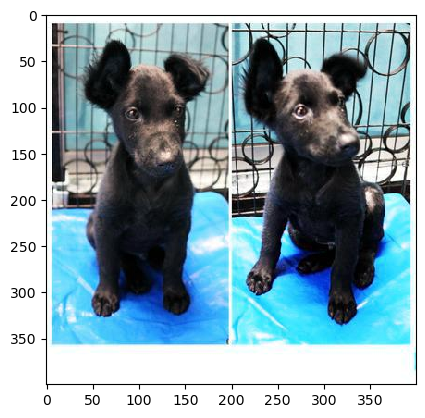

In [41]:
# cv2.imread(r".\images\news.jpg")
from matplotlib.image import imread
# train_df['Images'][8]
img = cv2.imread(X['Images'][8])
plt.imshow(img, cmap='gray', interpolation='nearest',aspect='equal')

In [42]:
X_train_without = preprocessor_without.fit_transform(X_train, y_train.ravel())

In [43]:
X_val_without = preprocessor_without.transform(X_valid)

### Fit and transform while balancing the dataset

In [44]:
X_train_balanced , y_train_balanced= preprocessor.fit_resample(X_train, y_train.ravel())
X_val_balanced = preprocessor[:-1].transform(X_valid)

### The different models with the best hyper parameters, after the cross validation.

The RandomizedSearchCV I have done only with the balanced dataset, I haven't try even with the non balanced dataset because in my computer it takes more than one day and sometimes it froze and I needed to switch off the computer and start again.

I separated with ``_without`` for the non balanced, so I don't have confusion after

In [45]:
model_logistic_without = LogisticRegression(solver =  'lbfgs',
                                                penalty =  'l2',  
                                                max_iter =  100,  
                                                class_weight = 'balanced',
                                                C = 0.1)
model_svc_without = make_pipeline(svm.SVC(kernel= 'rbf', gamma= 'scale', degree= 4, class_weight= 'balanced',
                                  C= 0.5))
model_random_without = make_pipeline(RandomForestClassifier(n_estimators= 50, 
                                                    min_samples_leaf= 3,
                                                    max_samples= None, 
                                                    bootstrap= False))
model_knn_without = make_pipeline(KNeighborsClassifier(n_neighbors=5, metric='euclidean'))
model_gbc_without = make_pipeline(GradientBoostingClassifier(n_estimators= 120, 
                                                     min_samples_split= 3,
                                                     max_depth= 5,
                                                     loss= 'deviance',
                                                     learning_rate= 0.2))

##### Models where I will train with balance dataset

In [46]:
model_logistic = LogisticRegression(solver =  'lbfgs',
                                                penalty =  'l2',  
                                                max_iter =  100,  
                                                class_weight = 'balanced',
                                                C = 0.1)
model_svc = make_pipeline(svm.SVC(kernel= 'rbf', gamma= 'scale', degree= 4, class_weight= 'balanced',
                                  C= 0.5))
model_random = make_pipeline(RandomForestClassifier(n_estimators= 50, 
                                                    min_samples_leaf= 3,
                                                    max_samples= None, 
                                                    bootstrap= False))
model_knn = make_pipeline(KNeighborsClassifier(n_neighbors=5, metric='euclidean'))
model_gbc = make_pipeline(GradientBoostingClassifier(n_estimators= 120, 
                                                     min_samples_split= 3,
                                                     max_depth= 5,
                                                     loss= 'deviance',
                                                     learning_rate= 0.2))

### Cross Validation

Cross-validation with RandomizedSearchCV is a technique used to optimize the hyperparameters of a machine learning model using randomized search. RandomizedSearchCV is a function from the scikit-learn library that performs hyperparameter tuning using a combination of random search and cross-validation.

The process works by defining a range of hyperparameters and their potential values. RandomizedSearchCV then randomly selects a combination of hyperparameter values from this range and trains and evaluates the model using cross-validation. The process is repeated multiple times, each time selecting a different set of hyperparameter values.

The advantage of RandomizedSearchCV is that it can be more efficient than an exhaustive grid search of all possible hyperparameter combinations. By randomly sampling the hyperparameter space, RandomizedSearchCV can often find good hyperparameter values with fewer evaluations.

The output of RandomizedSearchCV is the best set of hyperparameters that was found during the search, along with the corresponding cross-validation score. These hyperparameters can then be used to train the final model on the entire dataset.

In [47]:
model_svc.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

I run RandomizedSearchCV for every model, to find the best hyper-parameters among the parameters I set up below. However, I am comenting it because for only one model it takes one day in my computer. I ran it only one time and I saved the best parameters to reuse later.

#### Best hyper parameters for the logistic regression model.

In [48]:
#parameters_logistic = {}

#parameters_logistic['logisticregression__penalty'] = ['l1', 'l2', 'elasticnet', 'none']
#parameters_logistic['logisticregression__C'] = [0.1, 0.5, 1.0, 1.5, 2.0]
#parameters_logistic['logisticregression__solver'] = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
#parameters_logistic['logisticregression__class_weight'] = ['dict', 'balanced', None]
#parameters_logistic['logisticregression__max_iter'] = [80, 100, 120]

#Random = RandomizedSearchCV(model_logistic, parameters_logistic, scoring='accuracy', cv=3, verbose=2,n_jobs=None)
#Random.fit(X, y.ravel())
#Random.best_params_

- The result: ``{'logisticregression__solver': 'lbfgs',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': 100,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__C': 0.1}``

#### Best hyper parameters for the Random Forest Classifier

In [49]:
#parameters_random = {}

#parameters_random['randomforestclassifier__n_estimators'] = [50, 100, 150]
#parameters_random['randomforestclassifier__min_samples_split'] = [1, 2, 3]
#parameters_random['randomforestclassifier__min_samples_leaf'] = [1, 2, 3]
#parameters_random['randomforestclassifier__max_samples'] = ['sqrt', 'log2', None]
#parameters_random['randomforestclassifier__bootstrap'] = [True, False]

#Random = RandomizedSearchCV(model_random, parameters_random, scoring='accuracy', cv=3, verbose=2,n_jobs=None)
#Random.fit(X, y.ravel())
#Random.best_params_

- The result: ``{'randomforestclassifier__n_estimators': 50,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__bootstrap': False}``

#### Best hyper parameters for the Gradient Boosting classifier

In [50]:
#parameters_gbc = {}

#parameters_gbc['gradientboostingclassifier__n_estimators'] = [80, 100, 120]
#parameters_gbc['gradientboostingclassifier__learning_rate'] = [0.1, 0.2, 0.3]
#parameters_gbc['gradientboostingclassifier__max_depth'] = [3, 4, 5]
#parameters_gbc['gradientboostingclassifier__min_samples_split'] = [2, 3, 4]
#parameters_gbc['gradientboostingclassifier__loss'] = ['log_loss', 'deviance', 'exponential']

#Random = RandomizedSearchCV(model_gbc, parameters_gbc, scoring='accuracy', cv=3, verbose=2,n_jobs=None)
#Random.fit(X, y.ravel())
#Random.best_params_

- The Result: ``{'gradientboostingclassifier__n_estimators': 120,
 'gradientboostingclassifier__min_samples_split': 3,
 'gradientboostingclassifier__max_depth': 5,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__learning_rate': 0.2}``

#### Best hyper parameters for the SVC

In [51]:
#parameters_svc = {}

#parameters_svc['svc__C'] = [0.5, 1.0, 1.5]
#parameters_svc['svc__gamma'] = ['scale', 'auto']
#parameters_svc['svc__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
#parameters_svc['svc__degree'] = [2, 3, 4]
#parameters_svc['svc__class_weight'] = ['dict', 'balanced', None]

#Random = RandomizedSearchCV(model_svc, parameters_svc, scoring='accuracy', cv=3, verbose=2,n_jobs=None)
#Random.fit(X, y.ravel())
#print("the best parameters: ", Random.best_params_)

- The result:  {'svc__kernel': 'rbf', 'svc__gamma': 'scale', 'svc__degree': 4, 'svc__class_weight': 'balanced', 'svc__C': 0.5}

## Train the models (not balance dataset)

In [54]:
model_logistic_without.fit(X_train_without , y_train.ravel())
# model_random_without.fit(X_train_without , y_train.ravel()) 
# model_svc_without.fit(X_train_without , y_train.ravel())
# model_knn_without.fit(X_train_without , y_train.ravel())
# model_gbc_without.fit(X_train_without , y_train.ravel())


LogisticRegression(C=0.1, class_weight='balanced')

## Train the models (balance dataset)

In [55]:
model_logistic.fit(X_train_balanced , y_train_balanced.ravel())
# model_random.fit(X_train_balanced , y_train_balanced.ravel())
# model_svc.fit(X_train_balanced , y_train_balanced.ravel())
# model_knn.fit(X_train_balanced , y_train_balanced.ravel())
# model_gbc.fit(X_train_balanced , y_train_balanced.ravel())

LogisticRegression(C=0.1, class_weight='balanced')

### Predict (Not balance dataset)

In [56]:
y_pred_without_logistic = model_logistic_without.predict(X_val_without)
# y_pred_without_random = model_random_without.predict(X_val_without)
# y_pred_without_svc = model_svc_without.predict(X_val_without)
# y_pred_without_knn = model_knn_without.predict(X_val_without)
# y_pred_without_gbc = model_gbc_without.predict(X_val_without)

### Predict (balance dataset)

In [57]:
y_pred_logistic = model_logistic.predict(X_val_balanced)
# y_pred_random = model_random.predict(X_val_balanced)
# y_pred_svc = model_svc.predict(X_val_balanced)
# y_pred_knn = model_knn.predict(X_val_balanced)
# y_pred_gbc = model_gbc.predict(X_val_balanced)

## The metrics of the different models

As explicited before, we use ``cohen_kappa_score`` to assess our model's metrics.

In [58]:
from sklearn.metrics import cohen_kappa_score


kappa_train_logistic_without =cohen_kappa_score(y_valid, y_pred_without_logistic)
# kappa_train_random_without =cohen_kappa_score(y_valid, y_pred_without_random)
# kappa_train_svc_without =cohen_kappa_score(y_valid, y_pred_without_svc)
# kappa_train_knn_without =cohen_kappa_score(y_valid, y_pred_without_knn)
# kappa_train_gbc_without =cohen_kappa_score(y_valid, y_pred_without_gbc)

print("Kappa Score: unbalance dataset")
print("logistic: ", kappa_train_logistic_without)
# print("random: ", kappa_train_random_without)
# print("svc: ", kappa_train_svc_without)
# print("knn: ", kappa_train_knn_without)
# print("gbc: ", kappa_train_gbc_without)

Kappa Score: unbalance dataset
logistic:  0.1947056112146064


In [59]:
kappa_train_logistic =cohen_kappa_score(y_valid, y_pred_logistic)
# kappa_train_random =cohen_kappa_score(y_valid, y_pred_random)
# kappa_train_svc =cohen_kappa_score(y_valid, y_pred_svc)
# kappa_train_knn =cohen_kappa_score(y_valid, y_pred_knn)
# kappa_train_gbc =cohen_kappa_score(y_valid, y_pred_gbc)

print("Kappa Score: balance dataset")
print("logistic: ", kappa_train_logistic)
# print("random: ", kappa_train_random)
# print("svc: ", kappa_train_svc)
# print("knn: ", kappa_train_knn)
# print("gbc: ", kappa_train_gbc)

Kappa Score: balance dataset
logistic:  0.1987693463698924


Between the two methods I don't see a big difference in the accuracy, maybe it is because I am not using the true labels for comparing and I am not using the actual test data to predict but rather cross validation, which while useful, does not necessarily reflect the real data. From my experiment I did I don't see an improvement in the accuracy balancing the data, some models are even worse with balancing the data. But the right thing to do in our case is balancing the data as we have one class that appears very little.

## Using the full data set for training and creating the predictions for the test data

We can now train a model with our full dataset by using the best parameters we found before, and then use it on our test data to generate the values we want.

In [60]:
X_true , y_true= preprocessor.fit_resample(X, y.ravel())
X_test_true = preprocessor[:-1].transform(X_test)

In [61]:
model_logistic_true = LogisticRegression(solver =  'lbfgs',
                                                penalty =  'l2',  
                                                max_iter =  100,  
                                                class_weight = 'balanced',
                                                C = 0.1)
model_svc_true = make_pipeline(svm.SVC(kernel= 'rbf', gamma= 'scale', degree= 4, class_weight= 'balanced',
                                  C= 0.5))
model_random_true = make_pipeline(RandomForestClassifier(n_estimators= 50, 
                                                    min_samples_leaf= 3,
                                                    max_samples= None, 
                                                    bootstrap= False))
model_knn_true = make_pipeline(KNeighborsClassifier(n_neighbors=5, metric='euclidean'))
model_gbc_true = make_pipeline(GradientBoostingClassifier(n_estimators= 120, 
                                                     min_samples_split= 3,
                                                     max_depth= 5,
                                                     loss= 'deviance',
                                                     learning_rate= 0.2))

In [62]:
model_logistic_true.fit(X_true , y_true.ravel())
# model_random_true.fit(X_true , y_true.ravel()) 
# model_svc_true.fit(X_true , y_true.ravel())
# model_knn_true.fit(X_true , y_true.ravel())
# model_gbc_true.fit(X_true , y_true.ravel())

c:\Users\praba\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, class_weight='balanced')

In [63]:
y_pred_logistic_true = model_logistic_true.predict(X_test_true)
# y_pred_random_true = model_random_true.predict(X_test_true)
# y_pred_svc_true = model_svc_true.predict(X_test_true)
# y_pred_knn_true = model_knn_true.predict(X_test_true)
# y_pred_gbc_true = model_gbc_true.predict(X_test_true)

Like I said before, I had the best accuracy with Gradient Boosting Classifier, I choose it as the best model.

__A little explanation about Gradient Boosting__

Gradient Boosting is an ensemble method that combines multiple decision trees to improve the predictive performance of a model.

In Gradient Boosting, decision trees are built sequentially, with each tree trying to correct the errors made by the previous tree. The algorithm learns by minimizing a loss function, such as binary cross-entropy for classification problems, using gradient descent optimization. The final prediction is obtained by taking a weighted average of the predictions from all the trees.

In [64]:
models_pred = {}
models_pred['logistic'] = y_pred_logistic_true
# models_pred['random'] = y_pred_random_true
# models_pred['svc'] = y_pred_svc_true
# models_pred['knn'] = y_pred_knn_true
# models_pred['gbc'] = y_pred_gbc_true
# models_pred['best_gbc'] = y_pred_gbc_true

In [68]:
df = pd.DataFrame(models_pred)
print(df)

     logistic
0         1.0
1         2.0
2         2.0
3         4.0
4         0.0
..        ...
495       1.0
496       1.0
497       4.0
498       3.0
499       4.0

[500 rows x 1 columns]


In [70]:
df.to_csv('results.csv', index=False)